<a href="https://colab.research.google.com/github/funjoy/data-course-sample/blob/main/Alpha_Camp_%E6%8E%A8%E8%96%A6%E7%B3%BB%E7%B5%B1__S2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**基礎模組套件安裝**

In [ ]:
import pandas as pd
import gzip, json

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

**載入資料**

In [ ]:
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/All_Beauty.csv
!wget http://deepyeti.ucsd.edu/jianmo/amazon/metaFiles2/meta_All_Beauty.json.gz

--2021-12-27 11:08:15--  http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/All_Beauty.csv
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15499476 (15M) [application/octet-stream]
Saving to: ‘All_Beauty.csv.1’

All_Beauty.csv.1    100%[===================>]  14.78M  8.24MB/s    in 1.8s    

2021-12-27 11:08:17 (8.24 MB/s) - ‘All_Beauty.csv.1’ saved [15499476/15499476]

--2021-12-27 11:08:17--  http://deepyeti.ucsd.edu/jianmo/amazon/metaFiles2/meta_All_Beauty.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10329961 (9.9M) [application/octet-stream]
Saving to: ‘meta_All_Beauty.json.gz.1’

meta_All_Beauty.jso 100%[===================>]   9.85M  6.56MB/s    in 1.5s   

In [ ]:
metadata = getDF('/content/meta_All_Beauty.json.gz')
ratings = pd.read_csv('/content/All_Beauty.csv', names=['asin', 'reviewerID', 'overall', 'unixReviewTime'], header=None)

In [ ]:
metadata.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,[],,[Loud 'N Clear Personal Sound Amplifier allows...,,Loud 'N Clear&trade; Personal Sound Amplifier,[],,idea village,[],"2,938,573 in Beauty & Personal Care (",[],{'ASIN: ': '6546546450'},All Beauty,,,,6546546450,[],[]
1,[],,[No7 Lift & Luminate Triple Action Serum 50ml ...,,No7 Lift &amp; Luminate Triple Action Serum 50...,"[B01E7LCSL6, B008X5RVME]",,,[],"872,854 in Beauty & Personal Care (",[],"{'Shipping Weight:': '0.3 ounces (', 'ASIN: ':...",All Beauty,"class=""a-bordered a-horizontal-stripes a-spa...",,$44.99,7178680776,[],[]
2,[],,[No7 Stay Perfect Foundation now stays perfect...,,No7 Stay Perfect Foundation Cool Vanilla by No7,[],,No7,[],"956,696 in Beauty & Personal Care (","[B01B8BR0O8, B01B8BR0NO, B014MHXXM8]","{'Shipping Weight:': '3.5 ounces (', 'ASIN: ':...",All Beauty,,,$28.76,7250468162,[],[]
3,[],,[],,Wella Koleston Perfect Hair Colour 44/44 Mediu...,[B0041PBXX8],,,[],"1,870,258 in Beauty & Personal Care (",[],"{' Item Weight: ': '1.76 ounces', 'Sh...",All Beauty,,,,7367905066,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,[],,[Lacto Calamine Skin Balance Daily Nourishing ...,,Lacto Calamine Skin Balance Oil control 120 ml...,[],,Pirmal Healthcare,[],"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,,,$12.15,7414204790,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


In [ ]:
ratings.head()

,asin,reviewerID,overall,unixReviewTime
0,0143026860,A1V6B6TNIC10QE,1.0,1424304000
1,0143026860,A2F5GHSXFQ0W6J,4.0,1418860800
2,0143026860,A1572GUYS7DGSR,4.0,1407628800
3,0143026860,A1PSGLFK1NSVO,5.0,1362960000
4,0143026860,A6IKXKZMTKGSC,5.0,1324771200


**資料整理**

In [ ]:
ratings['DATE'] = pd.to_datetime(ratings['unixReviewTime'], unit='s')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


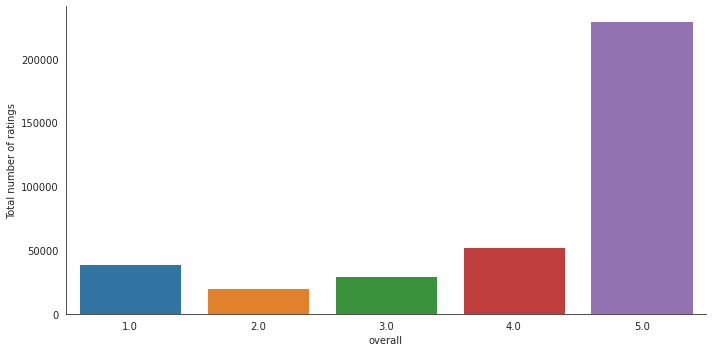

In [ ]:
import seaborn as sns

with sns.axes_style('white'):
    g = sns.factorplot("overall", data=ratings, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [ ]:
ratings.shape

(371345, 5)

In [ ]:
ratings.dtypes

asin                      object
reviewerID                object
overall                  float64
unixReviewTime             int64
DATE              datetime64[ns]
dtype: object

In [ ]:
ratings.info


<bound method DataFrame.info of               asin      reviewerID  overall  unixReviewTime       DATE
0       0143026860  A1V6B6TNIC10QE      1.0      1424304000 2015-02-19
1       0143026860  A2F5GHSXFQ0W6J      4.0      1418860800 2014-12-18
2       0143026860  A1572GUYS7DGSR      4.0      1407628800 2014-08-10
3       0143026860   A1PSGLFK1NSVO      5.0      1362960000 2013-03-11
4       0143026860   A6IKXKZMTKGSC      5.0      1324771200 2011-12-25
...            ...             ...      ...             ...        ...
371340  B01HJEGTYK  A202DCI7TV1022      1.0      1500508800 2017-07-20
371341  B01HJEGTYK  A3FSOR5IJOFIBE      5.0      1489622400 2017-03-16
371342  B01HJEGTYK  A1B5DK6CTP2P24      5.0      1488326400 2017-03-01
371343  B01HJEGTYK  A23OUYS5IRMJS9      2.0      1487635200 2017-02-21
371344  B01HJEGTYK  A24KQ9RVU81L87      2.0      1481760000 2016-12-15

[371345 rows x 5 columns]>

In [ ]:
ratings.describe()['overall'].T

count    371345.000000
mean          4.112093
std           1.362099
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64

In [ ]:
print('Number of missing values across columns: \n',ratings_trainings.isnull().sum())

Number of missing values across columns: 
 asin              0
reviewerID        0
overall           0
unixReviewTime    0
DATE              0
dtype: int64


In [ ]:
import numpy as np
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",ratings_trainings.shape[0])
print("Total No of Users   :", len(np.unique(ratings_trainings.reviewerID)))
print("Total No of products  :", len(np.unique(ratings_trainings.asin)))

Total data 
--------------------------------------------------

Total no of ratings : 370752
Total No of Users   : 323489
Total No of products  : 32582


**資料切分**

In [ ]:
ratings_trainings = ratings[
    (ratings['DATE'] < '2018-09-01')
]
ratings_testings = ratings[
    (ratings['DATE'] >= '2018-09-01') & 
    (ratings['DATE'] <= '2018-09-30')
]
ratings_testings_by_user = ratings_testings.groupby('reviewerID').agg(list).reset_index()[['reviewerID', 'asin']].to_dict('records')
ratings_testings_by_user = { rating['reviewerID']: rating['asin'] for rating in ratings_testings_by_user }
users = list(ratings_testings_by_user.keys())

**產生推薦**

In [ ]:
def recommender(training_data, users=[], metadata=None):
    '''
    * training_data: dataframe 輸入的訓練資料集（2018-09-01 以前資料）
    * users: [] 需要被推薦的使用者
    * k: int 每個使用者需要推薦的商品數
    * recommendations: dict
      {
          使用者一： [推薦商品一, 推薦商品二, ...],
          使用者二： [...], ...
      }
    len(np.unique(metadata.also_buy))
    6482
    len(np.unique(metadata.also_view))
    7894
    '''
    recommendations = {}
    ratings_trainings = training_data
    also_buyer=metadata[['asin','also_buy']]
    ratings_also_buyer = ratings_trainings[['asin', 'reviewerID']]
    ratings_also_buyer = ratings_also_buyer.merge(also_buyer, how='left', on='asin')
    #ratings_also_buyer.drop(['asin', 'also_buy'], 1, inplace=True)
    ratings_also_buyer.dropna(inplace=True)
    ratings_also_buyer_groupby_user = ratings_also_buyer.groupby('reviewerID').agg({'also_buy': 'sum'})
    for user in users:
        try:
            recommendations[user] = ratings_also_buyer_groupby_user.loc[user]['also_buy']
        except:
            pass
    return recommendations


ratings_by_user = recommender(ratings_trainings, users, metadata)
ratings_by_user

{'A13JU88JAHN72I': [],
 'A16Y7V1CZCWKFV': ['B0167ZNBPW',
  'B010NHL7NS',
  'B017XAIL7I',
  'B01M615HNW',
  'B01MRK5PD7',
  'B00ZHEW8CW',
  'B015ZOWENQ',
  'B010L4C4CQ',
  'B07194N7MR',
  'B01DK9E62A',
  'B00SUZZDPE',
  'B01680UANM',
  'B0756ZSRM6',
  'B01L37WPEC',
  'B01GHD8Y6K',
  'B01KX8I1AE',
  'B07CGHHWS8',
  'B01MTLLWUG',
  'B07317T97Q',
  'B00REOB6L2',
  'B076DBTCHN',
  'B074ZHYFPB',
  'B07GPF6S7G',
  'B07F5KKX97',
  'B01CG88B72',
  'B00W0N8NP4',
  'B075YKG5RC',
  'B01LXUWTVQ',
  'B07D6NHKPT',
  'B07D3Q3PPG',
  'B06VYJLGPP',
  'B0119ITH28',
  'B07JCCCWTV',
  'B07DFFRZ2M',
  'B01E34ES2O',
  'B06Y42HMK7',
  'B07BSBL5WG',
  'B00N9X58E8',
  'B0785R1DJP',
  'B01K7QLOFQ',
  'B077SB3PRZ',
  'B073PDPD3R',
  'B00JAEKN6I',
  'B073RQ8RGG',
  'B01FDTAQ7O',
  'B0144Z55FG',
  'B01LXNLAU9',
  'B07FVNH793',
  'B00Y8D9PR4',
  'B07BMM93CJ',
  'B00MGLANMG',
  'B01LZ9C4HB',
  'B07DD6PTSQ',
  'B075WRKSSL',
  'B01MXHG7L0',
  'B07D8VP37W',
  'B077MVFQWZ',
  'B0773QJN9W',
  'B01DZ3XN4S',
  'B072SJQW3B',

**結果評分**

In [ ]:
def evaluate(ratings_testings_by_user={}, ratings_by_user={}, method=None):
    '''
    * ratings_testings_by_user: dict 真實被購買的商品資料（2018-09-01 以後資料）
    * ratings_by_user: dict 利用訓練資料學習的推薦商品
    * method: str
    * score: float
    '''
    total = 0
    for d in ratings_testings_by_user:
        if d in ratings_by_user:
            total += len(set(ratings_by_user[d]) & set(ratings_testings_by_user[d]))

    score = total / len(ratings_testings)
    return score

evaluate(ratings_testings_by_user, ratings_by_user)